In [1]:
%install-location $cwd/swift-install
%install '.package(path: "$cwd/FastaiNotebook_07_batchnorm")' FastaiNotebook_07_batchnorm

Installing packages:
	.package(path: "/home/jmd/workspace/ml/fastai/nbs/swift/FastaiNotebook_07_batchnorm")
		FastaiNotebook_07_batchnorm
With SwiftPM flags: []
Working in: /tmp/tmpklw4eh4i/swift-install
/home/jmd/swift/usr/bin/swift-build: /home/jmd/anaconda3/lib/libcurl.so.4: no version information available (required by /home/jmd/swift/usr/lib/swift/linux/libFoundationNetworking.so)
[1/13] Compiling FastaiNotebook_07_batchnorm 02_fully_connected.swift
[2/13] Compiling FastaiNotebook_07_batchnorm 02a_why_sqrt5.swift
[3/13] Compiling FastaiNotebook_07_batchnorm 03_minibatch_training.swift
[4/13] Compiling FastaiNotebook_07_batchnorm 04_callbacks.swift
/home/jmd/workspace/ml/fastai/nbs/swift/FastaiNotebook_07_batchnorm/Sources/FastaiNotebook_07_batchnorm/04_callbacks.swift:27:25: warning: 'Dataset' is deprecated: Datasets will be removed in S4TF v0.10. Please use the new Batches API instead.
    public var innerDs: Dataset<Element>
                        ^
/home/jmd/workspace/ml/fasta

        return innerDs.shuffled(sampleCount: dsCount, randomSeed: seed).batched(bs)
                       ^
/home/jmd/workspace/ml/fastai/nbs/swift/FastaiNotebook_07_batchnorm/Sources/FastaiNotebook_07_batchnorm/04_callbacks.swift:38:73: warning: 'batched' is deprecated
        return innerDs.shuffled(sampleCount: dsCount, randomSeed: seed).batched(bs)
                                                                        ^
/home/jmd/workspace/ml/fastai/nbs/swift/FastaiNotebook_07_batchnorm/Sources/FastaiNotebook_07_batchnorm/04_callbacks.swift:58:29: warning: 'Dataset' is deprecated: Datasets will be removed in S4TF v0.10. Please use the new Batches API instead.
    return DataBunch(train: Dataset(elements: DataBatch(xb:xTrain, yb: yTrain)), 
                            ^
/home/jmd/workspace/ml/fastai/nbs/swift/FastaiNotebook_07_batchnorm/Sources/FastaiNotebook_07_batchnorm/04_callbacks.swift:59:29: warning: 'Dataset' is deprecated: Datasets will be removed in S4TF v0.10. Please use

                            ^
/home/jmd/workspace/ml/fastai/nbs/swift/FastaiNotebook_07_batchnorm/Sources/FastaiNotebook_07_batchnorm/04_callbacks.swift:59:29: warning: 'init(elements:)' is deprecated
                     valid: Dataset(elements: DataBatch(xb:xValid, yb: yValid)),
                            ^
[7/13] Compiling FastaiNotebook_07_batchnorm 00_load_data.swift
[8/13] Compiling FastaiNotebook_07_batchnorm 01_matmul.swift
[9/13] Compiling FastaiNotebook_07_batchnorm 01a_fastai_layers.swift
[10/13] Compiling FastaiNotebook_07_batchnorm 06_cuda.swift
/home/jmd/workspace/ml/fastai/nbs/swift/FastaiNotebook_07_batchnorm/Sources/FastaiNotebook_07_batchnorm/04_callbacks.swift:27:25: warning: 'Dataset' is deprecated: Datasets will be removed in S4TF v0.10. Please use the new Batches API instead.
    public var innerDs: Dataset<Element>
                        ^
[11/13] Compiling FastaiNotebook_07_batchnorm 07_batchnorm.swift
/home/jmd/workspace/ml/fastai/nbs/swift/FastaiNotebook_07_

In [2]:
//export
import Path
import TensorFlow
#if canImport(PythonKit)
    import PythonKit
#else
    import Python
#endif


In [3]:
import FastaiNotebook_07_batchnorm

In [4]:
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

('inline', 'module://ipykernel.pylab.backend_inline')


In [5]:
//export
public let dataPath = Path.home/".fastai"/"data"

In [6]:
//export
public func downloadImagenette(path: Path = dataPath, sz:String="-160") -> Path {
    let url = "https://s3.amazonaws.com/fast-ai-imageclas/imagenette\(sz).tgz"
    let fname = "imagenette\(sz)"
    let file = path/fname
    try! path.mkdir(.p)
    if !file.exists {
        downloadFile(url, dest:(path/"\(fname).tgz").string)
        _ = "/usr/bin/env".shell("tar", "-xzf", (path/"\(fname).tgz").string, "-C", path.string)
    }
    return file
}

In [7]:
let path = downloadImagenette(sz:"-320")

In [8]:
for e in path.ls() { print("\(e.path) (\(e.kind == .directory ? "directory": "file"))")}

/home/jmd/.fastai/data/imagenette-320/val (directory)
/home/jmd/.fastai/data/imagenette-320/train (directory)


In [9]:
for e in (path/"val").ls() { print("\(e.path) (\(e.kind == .directory ? "directory": "file"))")}

/home/jmd/.fastai/data/imagenette-320/val/n02102040 (directory)
/home/jmd/.fastai/data/imagenette-320/val/n03445777 (directory)
/home/jmd/.fastai/data/imagenette-320/val/n03028079 (directory)
/home/jmd/.fastai/data/imagenette-320/val/n03425413 (directory)
/home/jmd/.fastai/data/imagenette-320/val/n03000684 (directory)
/home/jmd/.fastai/data/imagenette-320/val/n03417042 (directory)
/home/jmd/.fastai/data/imagenette-320/val/n03888257 (directory)
/home/jmd/.fastai/data/imagenette-320/val/n01440764 (directory)
/home/jmd/.fastai/data/imagenette-320/val/n02979186 (directory)
/home/jmd/.fastai/data/imagenette-320/val/n03394916 (directory)


In [10]:
let pathTench = path/"val"/"n01440764"

In [11]:
let imgFn = Path.home/".fastai/data/imagenette-320/val/n01440764/ILSVRC2012_val_00006697.JPEG"
imgFn.string

"/home/jmd/.fastai/data/imagenette-320/val/n01440764/ILSVRC2012_val_00006697.JPEG"


In [12]:
let decodedImg = StringTensor(readFile: imgFn.string).decodeJpeg(channels: 3)

In [13]:
print(decodedImg.shape)

[320, 426, 3]


In [14]:
//export
public func showImg<T:NumpyScalarCompatible>(_ img: Tensor<T>, _ w: Int = 7, _ h: Int = 5) {
    showImg(img.makeNumpyArray(), w, h)
}

public func showImg(_ img: PythonObject, _ w: Int = 7, _ h: Int = 5) {
    plt.figure(figsize: [w, h])
    plt.imshow(img)
    plt.axis("off")
    plt.show()
}

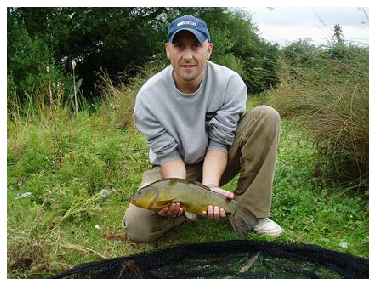

In [15]:
showImg(decodedImg)

In [16]:
//export
public func fetchFiles(path: Path, recurse: Bool = false, extensions: [String]? = nil) -> [Path] {
    var res: [Path] = []
    for p in try! path.ls(){
        if p.kind == .directory && recurse { 
            res += fetchFiles(path: p.path, recurse: recurse, extensions: extensions)
        } else if extensions == nil || extensions!.contains(p.path.extension.lowercased()) {
            res.append(p.path)
        }
    }
    return res
}

In [17]:
time { let fNames = fetchFiles(path: path, recurse: true, extensions: ["jpeg", "jpg"]) }

average: 1257.42996 ms,   min: 1257.42996 ms,   max: 1257.42996 ms


In [18]:
let fNames = fetchFiles(path: path, recurse: true, extensions: ["jpeg", "jpg"])

In [19]:
fNames.count == 13394

true


In [20]:
// export
public struct ItemList<Item>{
    public var items: [Item]
    public let path: Path
    
    public init(items: [Item], path: Path){
        (self.items,self.path) = (items,path)
    }
}

In [21]:
// export
public extension ItemList where Item == Path {
    init(fromFolder path: Path, extensions: [String], recurse: Bool = true) {
        self.init(items: fetchFiles(path: path, recurse: recurse, extensions: extensions),
                  path:  path)
    }
}

In [22]:
let il = ItemList(fromFolder: path, extensions: ["jpeg", "jpg"])

In [23]:
// export
public struct SplitData<Item>{
    public let train: ItemList<Item>
    public let valid: ItemList<Item>
    public var path: Path { return train.path }
    
    public init(train: ItemList<Item>, valid: ItemList<Item>){
        (self.train, self.valid) = (train, valid)
    }
    
    public init(_ il: ItemList<Item>, fromFunc: (Item) -> Bool){
        self.init(train: ItemList(items: il.items.filter { !fromFunc($0) }, path: il.path),
                  valid: ItemList(items: il.items.filter {  fromFunc($0) }, path: il.path))
    }
}

In [24]:
// export
public func grandParentSplitter(fName: Path, valid: String = "valid") -> Bool{
    return fName.parent.parent.basename() == valid
}

In [25]:
let sd = SplitData(il) { grandParentSplitter(fName: $0, valid: "val") }

In [26]:
// export
public protocol Processor {
    associatedtype Input
    associatedtype Output
    
    mutating func initState(items: [Input])
    func process1(item: Input) -> Output
    func deprocess1(item: Output) -> Input
}

In [27]:
// export
public extension Processor {
    func process(items: [Input]) -> [Output] {
        return items.map { process1(item: $0) }
    }
    
    func deprocess(items: [Output]) -> [Input] {
        return items.map { deprocess1(item: $0) }
    }
}

In [28]:
// export
public struct NoopProcessor<Item>: Processor {
    public init() {}
   
    public mutating func initState(items: [Item]) {}
    
    public func process1  (item: Item) -> Item { return item }
    public func deprocess1(item: Item) -> Item { return item }
}

In [29]:
// export
public struct CategoryProcessor: Processor {
    public init() {}
    public var vocab: [String]? = nil
    public var reverseMap: [String: Int32]? = nil
    
    public mutating func initState(items: [String]) {
        vocab = Array(Set(items)).sorted()
        reverseMap = [:]
        for (i,x) in vocab!.enumerated() { reverseMap![x] = Int32(i) }
    }
    
    public func process1  (item: String) -> Int32 { return reverseMap![item]! }
    public func deprocess1(item: Int32)  -> String { return vocab![Int(item)] }
}

In [30]:
//export
public struct LabeledItemList<PI,PL> where PI: Processor, PL: Processor{
    public var items: [PI.Output]
    public var labels: [PL.Output]
    public let path: Path
    public var procItem: PI
    public var procLabel: PL
    
    public init(rawItems: [PI.Input], rawLabels: [PL.Input], path: Path, procItem: PI, procLabel: PL){
        (self.procItem,self.procLabel,self.path) = (procItem,procLabel,path)
        self.items = procItem.process(items: rawItems)
        self.labels = procLabel.process(items: rawLabels)
    }
    
    public init(_ il: ItemList<PI.Input>, fromFunc: (PI.Input) -> PL.Input, procItem: PI, procLabel: PL){
        self.init(rawItems:  il.items,
                  rawLabels: il.items.map{ fromFunc($0)},
                  path:      il.path,
                  procItem:  procItem,
                  procLabel: procLabel)
    }
    
    public func rawItem (_ idx: Int) -> PI.Input { return procItem.deprocess1 (item: items[idx])  }
    public func rawLabel(_ idx: Int) -> PL.Input { return procLabel.deprocess1(item: labels[idx]) }
}

In [31]:
//export
public struct SplitLabeledData<PI,PL> where PI: Processor, PL: Processor{
    public let train: LabeledItemList<PI,PL>
    public let valid: LabeledItemList<PI,PL>
    public var path: Path { return train.path }
    
    public init(train: LabeledItemList<PI,PL>, valid: LabeledItemList<PI,PL>){
        (self.train, self.valid) = (train, valid)
    }
    
    public init(_ sd: SplitData<PI.Input>, fromFunc: (PI.Input) -> PL.Input, procItem: inout PI, procLabel: inout PL){
        procItem.initState(items: sd.train.items)
        let trainLabels = sd.train.items.map{ fromFunc($0) }
        procLabel.initState(items: trainLabels)
        self.init(train: LabeledItemList(rawItems: sd.train.items, rawLabels: trainLabels, path: sd.path, 
                                         procItem: procItem, procLabel: procLabel),
                  valid: LabeledItemList(sd.valid, fromFunc: fromFunc, procItem: procItem, procLabel: procLabel))
    }
}

/// Make a labeled data without an input processor, by defaulting to a noop processor.
public func makeLabeledData<T, PL: Processor>(_ sd: SplitData<T>, fromFunc: (T) -> PL.Input, procLabel: inout PL) 
 -> SplitLabeledData<NoopProcessor<T>, PL> {
    var pi = NoopProcessor<T>()
    return SplitLabeledData(sd, fromFunc: fromFunc, procItem: &pi, procLabel: &procLabel)
}


In [32]:
//export
public func parentLabeler(_ fName: Path) -> String { return fName.parent.basename() }

In [33]:
var (procItem,procLabel) = (NoopProcessor<Path>(),CategoryProcessor())
let sld = SplitLabeledData(sd, fromFunc: parentLabeler, procItem: &procItem, procLabel: &procLabel)

In [34]:
print(sld.train.labels[0])
print(sld.train.rawLabel(0))
print(sld.train.procLabel.vocab!)

1
n02102040
["n01440764", "n02102040", "n02979186", "n03000684", "n03028079", "n03394916", "n03417042", "n03425413", "n03445777", "n03888257"]


In [35]:
// export
public struct LabeledElement<I: TensorGroup, L: TensorGroup>: TensorGroup {
    public var xb: I
    public var yb: L    
    
    public init(xb: I, yb: L) {
        (self.xb, self.yb) = (xb, yb)
    }
    
    // Explicit implementation to make this struct work well with LazyTensor.
    // These will be derived automatically in the future.
    public var _tensorHandles: [_AnyTensorHandle] {
        xb._tensorHandles + yb._tensorHandles
    }
    
    public init<C: RandomAccessCollection>(
        _handles: C
    ) where C.Element: _AnyTensorHandle {
        let xStart = _handles.startIndex
        let xEnd = _handles.index(
            xStart, offsetBy: Int(I._tensorHandleCount))
        self.xb = I.init(_handles: _handles[xStart..<xEnd])
        self.yb = L.init(_handles: _handles[xEnd..<_handles.endIndex])
    }
}

In [36]:
// export
public extension SplitLabeledData {
    func toDataBunch<XB, YB> (
        itemToTensor: ([PI.Output]) -> XB, labelToTensor: ([PL.Output]) -> YB, bs: Int = 64
    ) -> DataBunch<LabeledElement<XB, YB>> where XB: TensorGroup, YB: TensorGroup {
        let trainDs = Dataset<LabeledElement<XB, YB>>(
            elements: LabeledElement(xb: itemToTensor(train.items), yb: labelToTensor(train.labels)))
        let validDs = Dataset<LabeledElement<XB, YB>>(
            elements: LabeledElement(xb: itemToTensor(valid.items), yb: labelToTensor(valid.labels)))
        return DataBunch(train: trainDs, valid: validDs, 
                         trainLen: train.items.count, validLen: valid.items.count,
                         bs: bs)
    }
}

In [37]:
// export
public func pathsToTensor(_ paths: [Path]) -> StringTensor { return StringTensor(paths.map{ $0.string })}
public func intsToTensor(_ items: [Int32]) -> Tensor<Int32> { return Tensor<Int32>(items)}

In [38]:
let dataset = sld.toDataBunch(itemToTensor: pathsToTensor, labelToTensor: intsToTensor)

In [39]:
// export
public func transformData<I,TI,L>(
    _ data: DataBunch<LabeledElement<I,L>>, 
    nWorkers:Int=1,
    tfmItem: (I) -> TI
) -> DataBunch<DataBatch<TI,L>> 
where I: TensorGroup, TI: TensorGroup & Differentiable, L: TensorGroup{
    return DataBunch(train: data.train.innerDs.map(parallelCallCount: nWorkers){ DataBatch(xb: tfmItem($0.xb), yb: $0.yb) },
                     valid: data.valid.innerDs.map(parallelCallCount: nWorkers){ DataBatch(xb: tfmItem($0.xb), yb: $0.yb) },
                     trainLen: data.train.dsCount, 
                     validLen: data.valid.dsCount,
                     bs: data.train.bs)
}

In [40]:
// export
public func openAndResize(fname: StringTensor, size: Int) -> TF{
    let decodedImg = StringTensor(readFile: fname).decodeJpeg(channels: 3)
    let resizedImg = Tensor<Float>(_Raw.resizeBilinear(
        images: Tensor<UInt8>([decodedImg]), 
        size: Tensor<Int32>([Int32(size), Int32(size)]))) / 255.0
    return resizedImg[0]
}

In [41]:
let tfmData = transformData(dataset) { openAndResize(fname: $0, size: 128) }

In [42]:
// export
public extension FADataset {
    func oneBatch() -> Element? {
        for batch in ds { return batch }
        return nil
    }
} 

In [43]:
let batch = tfmData.train.oneBatch()!
batch.xb.shape

▿ [64, 128, 128, 3]
  ▿ dimensions : 4 elements
    - 0 : 64
    - 1 : 128
    - 2 : 128
    - 3 : 3


In [44]:
// export
public func showImages(_ xb: TF, labels: [String]? = nil) {
    let (rows,cols) = (3,3)
    plt.figure(figsize: [9, 9])
    for i in 0..<(rows * cols) {
        let img = plt.subplot(rows, cols, i + 1)
        img.axis("off")
        let x = xb[i].makeNumpyArray()
        img.imshow(x)
        if labels != nil { img.set_title(labels![i]) }
        if (i + 1) >= (rows * cols) { break }
    }
    plt.show()
}

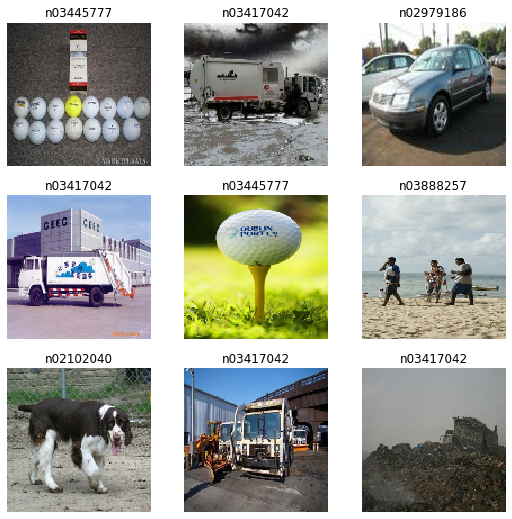

In [45]:
let labels = batch.yb.scalars.map { sld.train.procLabel.vocab![Int($0)] }
showImages(batch.xb, labels: labels)

In [46]:
let il = ItemList(fromFolder: path, extensions: ["jpeg", "jpg"])
let sd = SplitData(il, fromFunc: {grandParentSplitter(fName: $0, valid: "val")})
var (procItem,procLabel) = (NoopProcessor<Path>(), CategoryProcessor())
let sld = SplitLabeledData(sd, fromFunc: parentLabeler, procItem: &procItem, procLabel: &procLabel)
var rawData = sld.toDataBunch(itemToTensor: pathsToTensor, labelToTensor: intsToTensor, bs: 256)
var data = transformData(rawData) { openAndResize(fname: $0, size: 224) }

In [47]:
// tf.data reads the whole file into memory if we shuffle!
data.train.shuffle = false

In [48]:
time { let _ = data.train.oneBatch() }

average: 746.493249 ms,   min: 746.493249 ms,   max: 746.493249 ms


In [49]:
func allBatches() -> (Int,TF) {
    var m = TF(zeros: [224, 224, 3])
    var c: Int = 0
    for batch in data.train.ds { 
        m += batch.xb.mean(squeezingAxes: 0) 
        c += 1
    }
    return (c,m)
}

In [50]:
time {let (c,m) = allBatches()}

average: 16834.784484 ms,   min: 16834.784484 ms,   max: 16834.784484 ms


In [51]:
let il = ItemList(fromFolder: path, extensions: ["jpeg", "jpg"])
let sd = SplitData(il, fromFunc: {grandParentSplitter(fName: $0, valid: "val")})
var (procItem,procLabel) = (NoopProcessor<Path>(), CategoryProcessor())
let sld = SplitLabeledData(sd, fromFunc: parentLabeler, procItem: &procItem, procLabel: &procLabel)
var rawData = sld.toDataBunch(itemToTensor: pathsToTensor, labelToTensor: intsToTensor)
let data = transformData(rawData) { openAndResize(fname: $0, size: 128) }

In [52]:
//export 
public let imagenetStats = (mean: TF([0.485, 0.456, 0.406]), std: TF([0.229, 0.224, 0.225]))

In [53]:
//export
public func prevPow2(_ x: Int) -> Int { 
    var res = 1
    while res <= x { res *= 2 }
    return res / 2
}

In [54]:
//export
public struct CNNModel: Layer {
    public var convs: [ConvBN<Float>]
    public var pool = FAGlobalAvgPool2D<Float>()
    public var linear: FADense<Float>
    
    public init(channelIn: Int, nOut: Int, filters: [Int]){
        convs = []
        let (l1,l2) = (channelIn, prevPow2(channelIn * 9))
        convs = [ConvBN(l1,   l2,   stride: 1),
                 ConvBN(l2,   l2*2, stride: 2),
                 ConvBN(l2*2, l2*4, stride: 2)]
        let allFilters = [l2*4] + filters
        for i in 0..<filters.count { convs.append(ConvBN(allFilters[i], allFilters[i+1], stride: 2)) }
        linear = FADense<Float>(filters.last!, nOut)
    }
    
    @differentiable
    public func callAsFunction(_ input: TF) -> TF {
        return linear(pool(convs(input)))
    }
}

In [55]:
func optFunc(_ model: CNNModel) -> SGD<CNNModel> { return SGD(for: model, learningRate: 0.1) }
func modelInit() -> CNNModel { return CNNModel(channelIn: 3, nOut: 10, filters: [64, 64, 128, 256]) }
let learner = Learner(data: data, lossFunc: crossEntropy, optFunc: optFunc, modelInit: modelInit)
let recorder = learner.makeDefaultDelegates(metrics: [accuracy])
learner.addDelegate(learner.makeNormalize(mean: imagenetStats.mean, std: imagenetStats.std))

In [56]:
learner.fit(1)

Epoch 0: [1.5546793, 0.512]                                                     


In [57]:
import NotebookExport
let exporter = NotebookExport(Path.cwd/"08_data_block.ipynb")
print(exporter.export(usingPrefix: "FastaiNotebook_"))

success
